# MNIST FASHION 

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels, and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

In [2]:
# Import relevant modules for training the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read training set using pandas
df = pd.read_csv('fashion-mnist_train.csv')

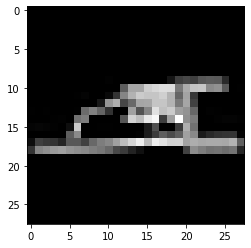

In [3]:
# Function to plot a random sample from a dataset
def plot_sample(dataset):
    # Gather sample
    sample = [dataset.iloc[np.random.randint(728), 1:]]
    # Convert to numpy array and reshape it into a 28x28 matrix
    sample = np.array([sample])
    sample = sample.reshape((28,28))
    # Plot the sample
    plt.gray()
    plt.imshow(sample, interpolation = 'nearest')
    plt.show()

# Call the function
plot_sample(df)

Unlike the digit dataset, kaggle has provided a testing data set with labels to use for testing the model. There will be no need to split the dataset into two seperate dataframes.

In [4]:
# Import NN classes 
from layer_dense import *
from cost_functions import *
from optimisers import *

# Randomise df
df = df.sample(frac=1)

# Create training dataset
X_train = df.iloc[:,1:]
y_train = df.iloc[:, 0]

# Convert X into a numpy array and ramdomise the dataset
X_train = np.array(X_train)

# Initiate hidden layer with 784 input values and 10 neurons
hidden_layer = LayerDense(784, 10)
# Initiate ReLU activation object
relu = ActivationRelU()
# Initiate output layer with 10 input values and 10 neurons 
output_layer = LayerDense(10, 10)
# Initate softmax and cost functions with the ActivationSoftmaxCost object
softmax_cost = ActivationSoftmaxCost()

# Initiate optimiser object for back propagation 
sgd = Optimizer_SGD(learning_rate=0.001 ,decay=1.1e-4, momentum=100)

# Train in epochs. 501 iterations.
for epoch in range(501):
    # Forward propagation
    hidden_layer.forward(X_train)
    relu.forward(hidden_layer.output)
    output_layer.forward(relu.output)
    
    # Calculate error
    cost = softmax_cost.forward(output_layer.output, y_train)
    
    # Calculate accuracy from output of softmax and y
    predictions = np.argmax(softmax_cost.output, axis=1)
    accuracy = np.mean(predictions==y_train)
    
    # Print statistics per set of epochs
    if not epoch % 10:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {cost:.3f}, ' +
              f'lr: {sgd.current_learning_rate}')
        
    # Back propagation 
    softmax_cost.backward(softmax_cost.output, y_train)
    output_layer.backward(softmax_cost.dinputs)
    relu.backward(output_layer.dinputs)
    hidden_layer.backward(relu.dinputs)
    
    # Update weights and biases
    sgd.pre_update_params()
    sgd.update_params(hidden_layer)
    sgd.update_params(output_layer)
    sgd.post_update_params()

epoch: 0, acc: 0.121, loss: 2.374, lr: 0.001
epoch: 10, acc: 0.402, loss: 1.637, lr: 0.0009990109791306607
epoch: 20, acc: 0.597, loss: 1.182, lr: 0.0009979143589897116
epoch: 30, acc: 0.629, loss: 1.060, lr: 0.0009968201437414647
epoch: 40, acc: 0.571, loss: 1.041, lr: 0.0009957283254836751
epoch: 50, acc: 0.624, loss: 0.983, lr: 0.0009946388963486806
epoch: 60, acc: 0.643, loss: 0.895, lr: 0.000993551848503214
epoch: 70, acc: 0.670, loss: 0.845, lr: 0.000992467174148215
epoch: 80, acc: 0.683, loss: 0.812, lr: 0.000991384865518643
epoch: 90, acc: 0.696, loss: 0.785, lr: 0.0009903049148832926
epoch: 100, acc: 0.707, loss: 0.764, lr: 0.0009892273145446092
epoch: 110, acc: 0.715, loss: 0.747, lr: 0.0009881520568385063
epoch: 120, acc: 0.722, loss: 0.732, lr: 0.0009870791341341834
epoch: 130, acc: 0.730, loss: 0.718, lr: 0.0009860085388339465
epoch: 140, acc: 0.737, loss: 0.705, lr: 0.0009849402633730264
epoch: 150, acc: 0.742, loss: 0.693, lr: 0.000983874300219404
epoch: 160, acc: 0.747,

For this dataset, the same model used for the digit MNIST data, achieved ~81% accuracy. This can be expected as identify chothes is more complex then identifying digits. 

In [5]:
# Read test dataset
df = pd.read_csv('fashion-mnist_test.csv')

# Create testing dataset
X_test = df.iloc[:,1:]
y_test = df.iloc[:, 0]

# Pass dataset through the model using the final params
hidden_layer.forward(X_test)
relu.forward(hidden_layer.output)
output_layer.forward(relu.output)
cost = softmax_cost.forward(output_layer.output, y_test)

# Calculate accuracy and loss for the test dataset
predictions = np.argmax(softmax_cost.output, axis = 1)
# If y_test is a binary vector, convert to scalar values
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis = 1)
accuracy = np.mean(predictions == y_test)

# Print statistics
print(f'test, acc: {accuracy:.3f}, loss: {cost:.3f}')

test, acc: 0.813, loss: 0.538


It can be concluded that major overfitting hasn't occured with 82% accuracy on the testing dataset. 

The MNIST fashion dataset doesn't have unseen data where there are no labels, but the model can still be used with the testing dataset to demonstrate how accurate the model can be on single samples.

The labels indicate a type of clothing by its corresponding number. A dictionary can be created to be used to give the prediction a string value rather than a integer.

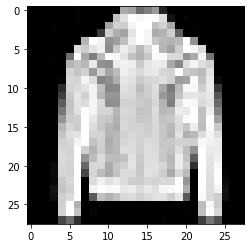

The model predicted the clothing is a Coat


In [9]:
# Create dictionary to get the type of clothing using a integer key.
mnist_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Function to generate a random sample from a dataset
def random_sample(dataset):
    # Gather sample
    sample = [dataset.iloc[np.random.randint(728), 1:]]
    # Convert to numpy array and reshape it into a 28x28 matrix
    sample_array = np.array([sample])
    sample_array = sample_array.reshape((28,28))
    # Plot the sample
    return sample, sample_array

# Plot random sample from the dataset
sample, sample_array = random_sample(df)
plt.imshow(sample_array, interpolation = 'nearest')
plt.show()

# Convert sample into an numpy array
sample = np.array(sample)

# Need the activation softmax class as we are no longer calculating error
softmax = ActivationSoftmax()

# Pass sample to initiate forward propagation
hidden_layer.forward(sample)
relu.forward(hidden_layer.output)
output_layer.forward(relu.output)
softmax.forward(output_layer.output)

# Print prediction
print("The model predicted the clothing is a", mnist_labels[np.argmax(softmax.output)])

When comparing the prediction with the plot sample, it is even hard to identify the sample to the correct label by eye. This is strong reason why the same model had lower accuracy compared to the digit dataset